<a href="https://colab.research.google.com/github/Mishak7/Finance/blob/main/Financial_Econometrics_Seminar_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


#### Price-dividend ratio

In [8]:
bubbles = pd.read_excel('/content/drive/MyDrive/HSE/bubbles.xlsx')
bubbles['log_div'] = np.log(bubbles['dividend'])
bubbles['log_price'] = np.log(bubbles['price'])
bubbles['ratio'] = bubbles['log_price'] - bubbles['log_div']
bubbles

,datevec,dividend,price,log_div,log_price,ratio
0,1960-01-01,1.86667,58.03,0.624156,4.060960,3.436804
1,1960-02-01,1.90333,55.78,0.643605,4.021415,3.377810
2,1960-03-01,1.94000,55.02,0.662688,4.007697,3.345009
3,1960-04-01,1.94333,55.73,0.664403,4.020519,3.356116
4,1960-05-01,1.94667,55.22,0.666120,4.011325,3.345205
...,...,...,...,...,...,...
355,1989-08-01,10.54670,346.60,2.355813,5.848171,3.492358
356,1989-09-01,10.67000,347.30,2.367436,5.850189,3.482753
357,1989-10-01,10.79670,347.40,2.379241,5.850477,3.471236
358,1989-11-01,10.92330,340.20,2.390898,5.829534,3.438636


#### Testing the whole dataset
#### Phillips Wu and Yu (2011) Critical values for right tailed tests
1%			0.60			  
5%		 -0.09			  

In [5]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(bubbles['ratio'])

print('ADF Statistic:', result[0])
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')


ADF Statistic: -2.425546345267615
Critical Values:
	1%: -3.4489583388155194
	5%: -2.869739378430086
	10%: -2.5711381780459


#### We cannot reject the hypothesis of non-stationarity + we cannot reject it in favor of bubble as well

#### Rolling window

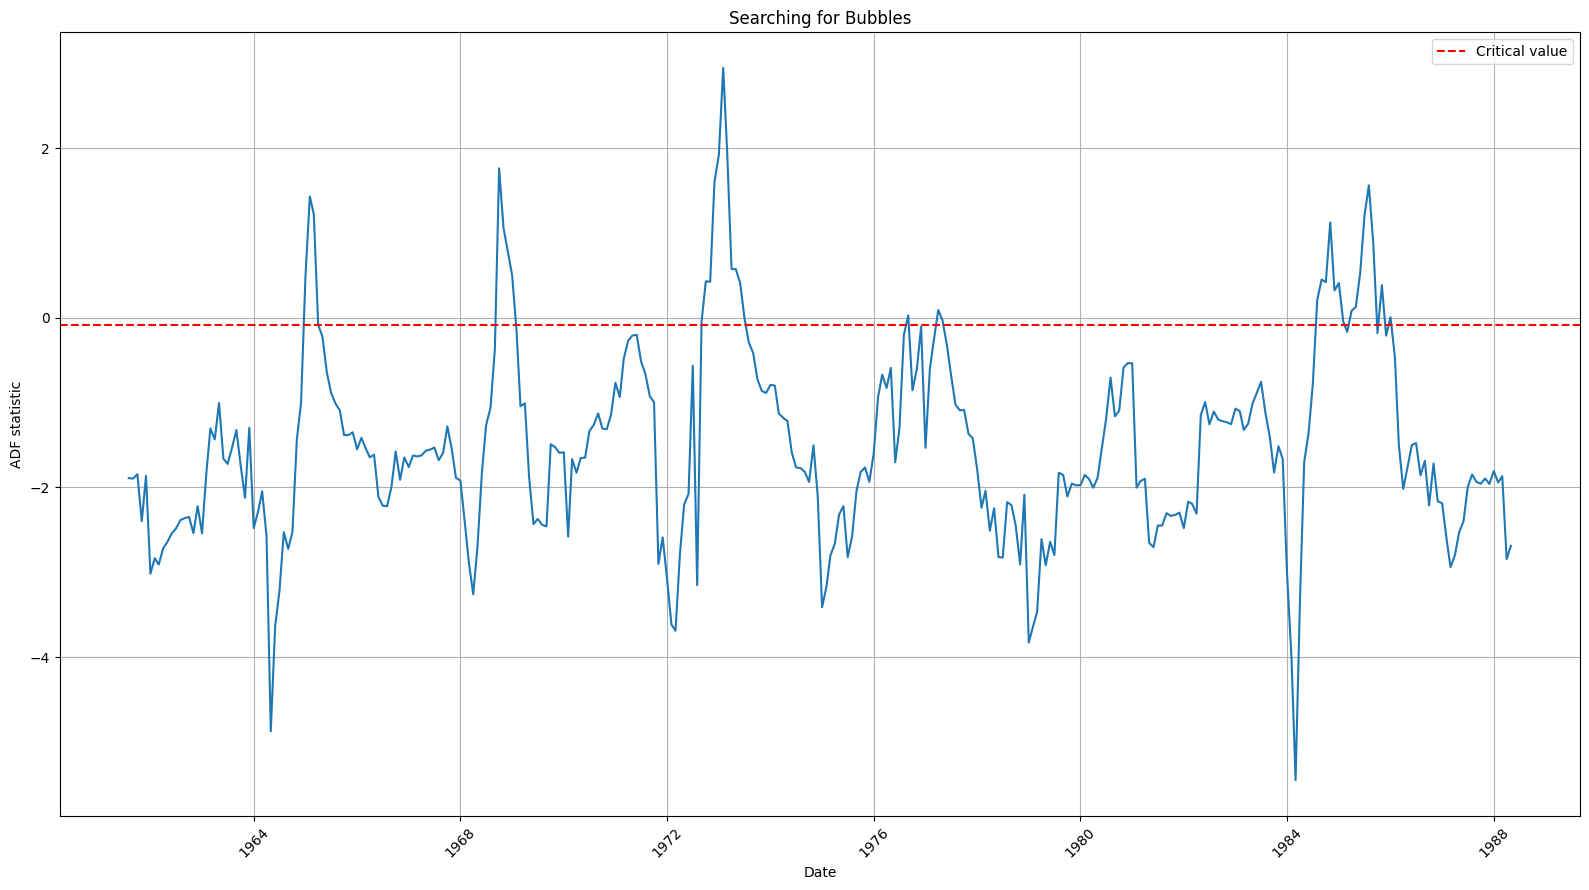

In [6]:
window_size = 39
total_observations = len(bubbles)

results = []
dates_window = []

for i in range(total_observations - window_size + 1):
    window_data = bubbles['ratio'].iloc[i:i + window_size]
    results.append(adfuller(window_data)[0])
    middle_index = i + window_size // 2
    dates_window.append(bubbles['datevec'].iloc[middle_index])

fig, ax = plt.subplots(figsize=(16,9))
plt.plot(dates_window, results)
plt.title('Searching for Bubbles')
plt.grid(True)
plt.ylabel('ADF statistic')
plt.xlabel('Date')

plt.axhline(y=-0.09, color='r', linestyle='--', label='Critical value')
plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### We see that when looking on the smaller subsets, there are periods when the unit root hypothesis is reject in favor of > 1 hypothesis meaning bubble.

#### Forward Recursive

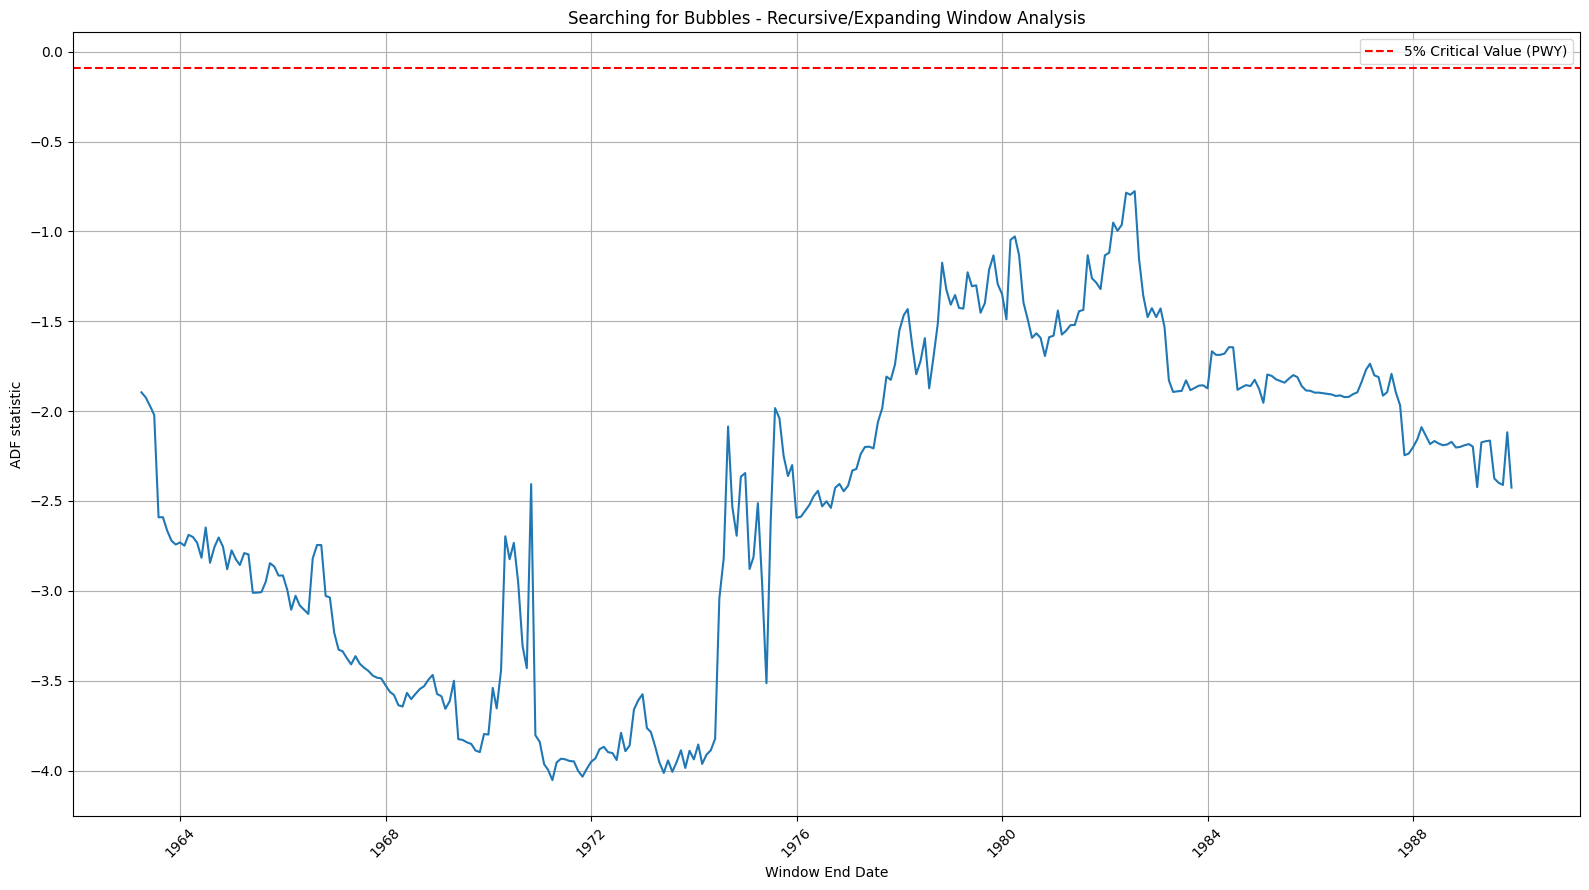

In [7]:
window_size = 39
total_observations = len(bubbles)

results = []
end_dates = []

for i in range(total_observations):
    end_index = min(i + window_size, total_observations)
    window_data = bubbles['ratio'].iloc[0:end_index]

    if len(window_data) > window_size:
        results.append(adfuller(window_data)[0])
        end_dates.append(bubbles['datevec'].iloc[end_index - 1])

fig, ax = plt.subplots(figsize=(16,9))
plt.plot(end_dates, results)
plt.title('Searching for Bubbles - Recursive/Expanding Window Analysis')
plt.grid(True)
plt.ylabel('ADF statistic')
plt.xlabel('Window End Date')

plt.axhline(y=-0.09, color='r', linestyle='--', label='5% Critical Value (PWY)')
plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### No bubbles detected here.

# Question 2

In [9]:
pv = pd.read_csv('/content/drive/MyDrive/HSE/pv.csv')
pv

,Date,P,D,E,CPI,Date Fraction,Long IR GS10,Real Price,Real Dividend,Real Earnings,CAPE (P/E10),Date (CCYY-MM)
0,1871.01,4.44,0.26,0.4,12.460,1871.04,5.32,86.98,5.09,7.84,NaN,1871-01
1,1871.02,4.50,0.26,0.4,12.840,1871.13,5.32,85.54,4.94,7.60,NaN,1871-02
2,1871.03,4.61,0.26,0.4,13.030,1871.21,5.33,86.36,4.87,7.49,NaN,1871-03
3,1871.04,4.74,0.26,0.4,12.560,1871.29,5.33,92.15,5.05,7.78,NaN,1871-04
4,1871.05,4.86,0.26,0.4,12.270,1871.38,5.33,96.69,5.17,7.96,NaN,1871-05
...,...,...,...,...,...,...,...,...,...,...,...,...
1751,2016.12,2246.63,45.70,NaN,241.432,2016.96,2.49,2272.16,46.22,NaN,27.93,2016-12
1752,2017.01,2275.12,45.93,NaN,242.839,2017.04,2.43,2287.65,46.18,NaN,28.17,2017-01
1753,2017.02,2329.91,46.15,NaN,243.603,2017.12,2.42,2335.39,46.26,NaN,28.81,2017-02
1754,2017.03,2345.96,46.38,NaN,243.985,2017.21,2.48,2347.80,46.42,NaN,29.02,2017-03


#### VAR order selection

In [12]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.vector_ar.var_model import VARResults

var_data = pv[['P', 'D', 'E']].dropna()
for column in var_data.columns:
    var_data[column] = np.log(var_data[column])

var_model = VAR(var_data)

lag_order_result_var = var_model.select_order(maxlags=12)
print(lag_order_result_var.summary())


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -4.231      -4.222     0.01454      -4.228
1       -21.78      -21.75   3.459e-10      -21.77
2       -22.78      -22.72   1.274e-10      -22.76
3       -22.95     -22.85*   1.082e-10      -22.91
4       -22.97      -22.84   1.062e-10      -22.92
5       -22.99      -22.84   1.038e-10      -22.93
6       -22.99      -22.82   1.031e-10      -22.93
7       -23.04      -22.83   9.894e-11      -22.96
8      -23.07*      -22.83  9.607e-11*     -22.98*
9       -23.06      -22.80   9.642e-11      -22.96
10      -23.06      -22.77   9.656e-11      -22.95
11      -23.07      -22.74   9.614e-11      -22.95
12      -23.06      -22.71   9.640e-11      -22.93
--------------------------------------------------


#### Plotting the time series

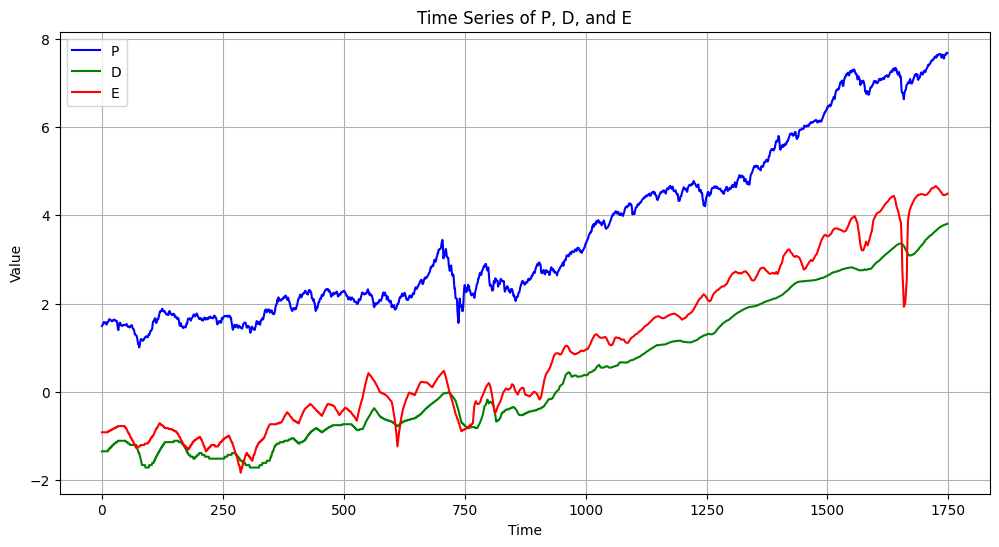

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(var_data.index, var_data['P'], label='P', color='blue')
plt.plot(var_data.index, var_data['D'], label='D', color='green')
plt.plot(var_data.index, var_data['E'], label='E', color='red')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series of P, D, and E')
plt.legend()
plt.grid(True)

plt.show()

#### VAR estimation

In [13]:
fitted_var = var_model.fit(8)
print(fitted_var.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 21, Oct, 2025
Time:                     12:02:26
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -22.8360
Nobs:                     1741.00    HQIC:                  -22.9843
Log likelihood:           12747.4    FPE:                9.55607e-11
AIC:                     -23.0713    Det(Omega_mle):     9.15596e-11
--------------------------------------------------------------------
Results for equation P
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         0.026315         0.010631            2.475           0.013
L1.P          1.287602         0.024216           53.171           0.000
L1.D          0.071724         0.089640            0.800           0.424
L1.E          0.029646 

#### Test for cointegration
lag = 6, because optimal lag number for VECM is number of lags for VAR-1 and lags for Johansen are VECM lags - 1

In [21]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

lag = 6

result = coint_johansen(var_data, det_order=0, k_ar_diff=lag)

print("Johansen (Trace statistic):")
for i, trace_stat in enumerate(result.lr1):
    print(f'Rank {i}: Statistic = {trace_stat:.3f}, 95% critical = {result.cvt[i,1]}')

print("\nJohansen (Max Eigenvalue):")
for i, max_eig_stat in enumerate(result.lr2):
    print(f'Rank {i}: Statistic = {max_eig_stat:.3f}, 95% critical = {result.cvm[i,1]}')

Johansen (Trace statistic):
Rank 0: Statistic = 113.952, 95% critical = 29.7961
Rank 1: Statistic = 20.785, 95% critical = 15.4943
Rank 2: Statistic = 1.118, 95% critical = 3.8415

Johansen (Max Eigenvalue):
Rank 0: Statistic = 93.167, 95% critical = 21.1314
Rank 1: Statistic = 19.667, 95% critical = 14.2639
Rank 2: Statistic = 1.118, 95% critical = 3.8415


#### Results show that rank of cointegration equals 2 - there are 2 cointegration equations.

In [28]:
from statsmodels.tsa.vector_ar.vecm import VECM, select_order, select_coint_rank

model = VECM(var_data, k_ar_diff=7, coint_rank=2, deterministic = 'ci')
vecm_res = model.fit()
print(vecm_res.summary())

Det. terms outside the coint. relation & lagged endog. parameters for equation P
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
L1.P           0.2997      0.024     12.481      0.000       0.253       0.347
L1.D           0.0741      0.088      0.840      0.401      -0.099       0.247
L1.E           0.0227      0.038      0.598      0.550      -0.052       0.097
L2.P          -0.0648      0.025     -2.581      0.010      -0.114      -0.016
L2.D           0.2180      0.087      2.498      0.012       0.047       0.389
L2.E          -0.0041      0.044     -0.092      0.926      -0.091       0.083
L3.P          -0.0267      0.025     -1.058      0.290      -0.076       0.023
L3.D           0.0612      0.090      0.683      0.495      -0.114       0.237
L3.E           0.0541      0.045      1.212      0.226      -0.033       0.142
L4.P           0.0314      0.025      1.245      0

#### Long-run relations:

1. ec1: 1xP + 0xD - 1.1258xE - 2.6837 = 0
        P = 2.6837 + 1.1258xE
2. ec2: 0xP + 1xD - 0.9192xE + 0.3963 = 0
        D = -0.3963 + 0.9192xE

So, there are strong relations: earnings positively affects the price, as well as increases the dividends

#### Loading coefficients:
Equation P (Price):
ec1 = -0.0105: Slow correction (significant).
ec2 = 0.0017: Negligible correction (not significant).

Equation D (Dividends):
ec1 = 0.0025: Slow correction (significant).
ec2 = -0.0117: Moderate correction (significant).

Equation E (Earnings):
ec1 = 0.0024: Negligible correction (not significant).
ec2 = 0.0135: Moderate correction (significant).



#### Re-estimating the relations with other ordering


In [30]:
var_data_re = pv[['P', 'E', 'D']].dropna()
for column in var_data_re.columns:
    var_data_re[column] = np.log(var_data_re[column])

model_re = VECM(var_data_re, k_ar_diff=7, coint_rank=2, deterministic = 'ci')
vecm_res_re = model_re.fit()
print(vecm_res_re.summary())

Det. terms outside the coint. relation & lagged endog. parameters for equation P
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
L1.P           0.2997      0.024     12.481      0.000       0.253       0.347
L1.E           0.0227      0.038      0.598      0.550      -0.052       0.097
L1.D           0.0741      0.088      0.840      0.401      -0.099       0.247
L2.P          -0.0648      0.025     -2.581      0.010      -0.114      -0.016
L2.E          -0.0041      0.044     -0.092      0.926      -0.091       0.083
L2.D           0.2180      0.087      2.498      0.012       0.047       0.389
L3.P          -0.0267      0.025     -1.058      0.290      -0.076       0.023
L3.E           0.0541      0.045      1.212      0.226      -0.033       0.142
L3.D           0.0612      0.090      0.683      0.495      -0.114       0.237
L4.P           0.0314      0.025      1.245      0

#### Cointegration Relations

ec1: 1xP + 0xE − 1.2248xD = 3.16901
Prices adjust to long-run equilibrium with earnings.

ec2: 0xP + 1xE − 1.0879xD = −0.43110
Dividends adjust to long-run equilibrium with earnings.

Equation P (Price):
ec1 = -0.0105: Slow correction to equilibrium with dividends (D).
ec2 = 0.0102: Weak positive adjustment to equilibrium with earnings (E).

Equation E (Earnings):
ec1 = 0.0024: Negligible correction to equilibrium with dividends (D).
ec2 = -0.0151: Moderate negative adjustment to equilibrium with price (P).

Equation D (Dividends):
ec1 = 0.0025: Slow correction to equilibrium with price (P).
ec2 = 0.0079: Moderate positive adjustment to equilibrium with earnings (E).

